# 모델 준비

In [ ]:
!pip install --upgrade scikit-learn
!pip install shap
#설치 후 런타임 재시작 필수

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/231202 데이터마이닝 팀플/sample_for_tom.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86622 entries, 0 to 86621
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               86622 non-null  float64
 1   age               86622 non-null  float64
 2   sight_left        86622 non-null  float64
 3   sight_right       86622 non-null  float64
 4   DBP               86622 non-null  float64
 5   tot_chole         86622 non-null  float64
 6   HDL_chole         86622 non-null  float64
 7   LDL_chole         86622 non-null  float64
 8   triglyceride      86622 non-null  float64
 9   hemoglobin        86622 non-null  float64
 10  urine_protein     86622 non-null  float64
 11  serum_creatinine  86622 non-null  float64
 12  SGOT_AST          86622 non-null  float64
 13  SGOT_ALT          86622 non-null  float64
 14  gamma_GTP         86622 non-null  float64
 15  SMK_stat_type_cd  86622 non-null  float64
 16  DRK_YN            86622 non-null  float6

# Multinumial NB

## 1. defalut

Precision: 0.7694496799868549
Recall: 0.6910822510822511
F1 Score: 0.7246174528582472

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83     14343
         1.0       0.24      0.25      0.24      2626
         2.0       0.09      0.49      0.15       356

    accuracy                           0.69     17325
   macro avg       0.40      0.50      0.41     17325
weighted avg       0.77      0.69      0.72     17325



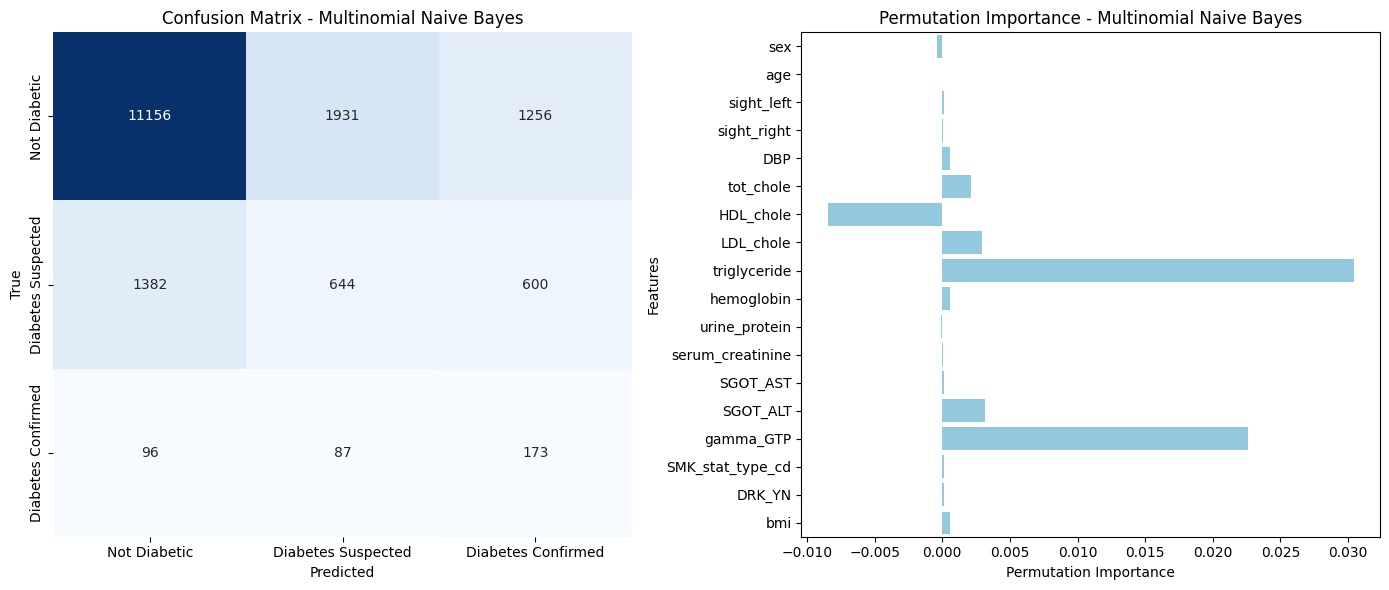

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.inspection import permutation_importance

# 데이터 프레임에서 독립 변수와 종속 변수를 분리
X = df.drop('diabete', axis=1)
y = df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 멀티노미얼 나이브 베이즈 모델 초기화 (라플라스 스무딩 적용)
alpha_value = 0  # 라플라스 스무딩 파라미터
mnb_model = MultinomialNB(alpha=alpha_value)

# 모델 학습
mnb_model.fit(X_train, y_train)

# 예측
y_pred = mnb_model.predict(X_test)

# 정밀도, 재현율, F1 점수 출력
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

# classification_report 출력
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred))

# 컨퓨전 매트릭스 시각화
plt.figure(figsize=(14, 6))

# 컨퓨전 매트릭스
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Diabetic', 'Diabetes Suspected', 'Diabetes Confirmed'],
            yticklabels=['Not Diabetic', 'Diabetes Suspected', 'Diabetes Confirmed'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')

# 순열 중요도 시각화
plt.subplot(1, 2, 2)
sns.barplot(x=result.importances_mean, y=feature_names, color='skyblue')
plt.title('Permutation Importance - Multinomial Naive Bayes')
plt.xlabel('Permutation Importance')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

## 2. 하이퍼파라미터 튜닝 (그리드서치)

Best Hyperparameters: {'alpha': 1000.0, 'class_prior': None, 'fit_prior': True}
Precision: 0.7690014469625595
Recall: 0.6906204906204906
F1 Score: 0.7242186920956375

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83     14343
         1.0       0.24      0.25      0.24      2626
         2.0       0.08      0.48      0.14       356

    accuracy                           0.69     17325
   macro avg       0.40      0.50      0.40     17325
weighted avg       0.77      0.69      0.72     17325



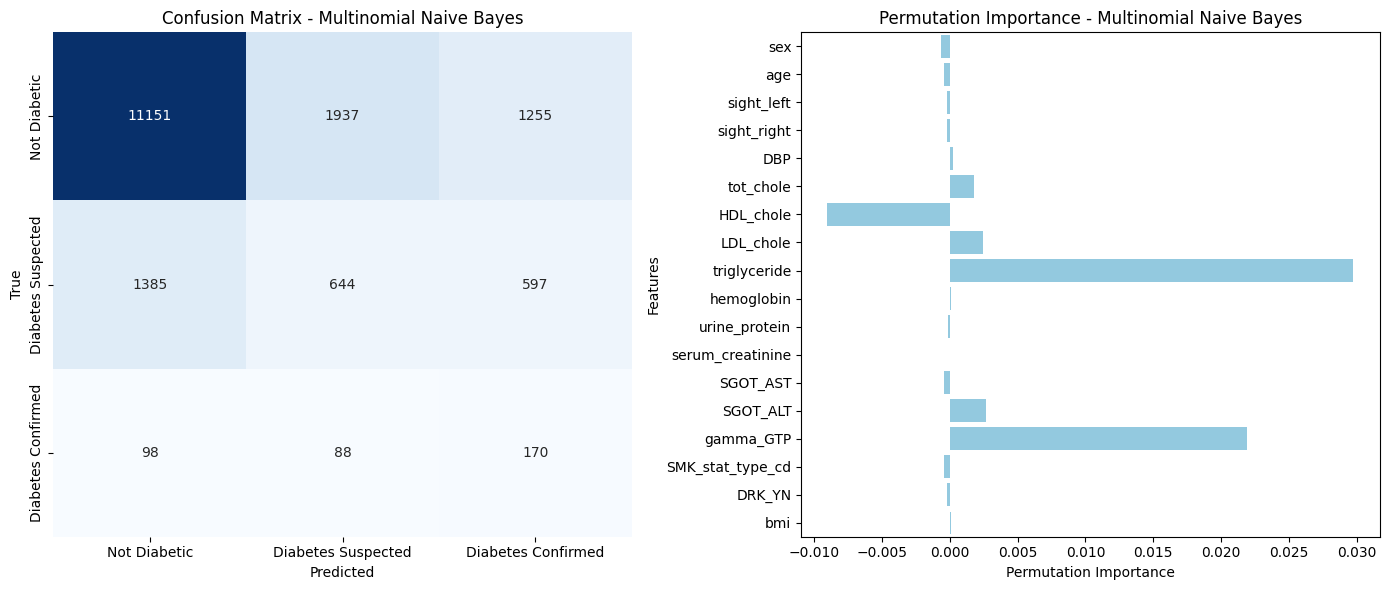

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.inspection import permutation_importance

# 데이터 프레임에서 독립 변수와 종속 변수를 분리
X = df.drop('diabete', axis=1)
y = df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multinomial Naive Bayes 모델 초기화
mnb_model = MultinomialNB()

# 하이퍼파라미터 그리드 설정
# 하이퍼파라미터 그리드 설정
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0],  # 라플라스 스무딩 파라미터
    'fit_prior': [True, False],  # 클래스의 사전 확률을 학습할지 여부
    'class_prior': [None, [0.2, 0.3, 0.5]],  # 클래스의 사전 확률 직접 지정 (예: [class_0_prob, class_1_prob, class_2_prob])
}


# 그리드 서치를 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(mnb_model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 값을 출력
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# 최적의 하이퍼파라미터를 사용하여 모델 초기화
mnb_model = MultinomialNB(**best_params)

# 모델 학습
mnb_model.fit(X_train, y_train)

# 예측
y_pred = mnb_model.predict(X_test)

# 정밀도, 재현율, F1 점수 출력
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

# classification_report 출력
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred))

# 컨퓨전 매트릭스 시각화
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(14, 6))

# 컨퓨전 매트릭스
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Diabetic', 'Diabetes Suspected', 'Diabetes Confirmed'],
            yticklabels=['Not Diabetic', 'Diabetes Suspected', 'Diabetes Confirmed'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')

# 순열 중요도 시각화
result = permutation_importance(mnb_model, X_test, y_test, n_repeats=30, random_state=42)

plt.subplot(1, 2, 2)
sns.barplot(x=result.importances_mean, y=X.columns, color='skyblue')
plt.title('Permutation Importance - Multinomial Naive Bayes')
plt.xlabel('Permutation Importance')
plt.ylabel('Features')

plt.tight_layout()
plt.show()


## 3. 앙상블 시도

Multinomial Naive Bayes Accuracy: 0.6910822510822511
Random Forest Ensemble Accuracy: 0.8278210678210678
Gradient Boosting Ensemble Accuracy: 0.827936507936508

Permutation Importance (Random Forest):
Feature 1: -4.425204425208736e-05
Feature 2: 0.0011871091871091589
Feature 3: -0.0002520442520442886
Feature 4: -9.812409812413788e-05
Feature 5: 0.00048677248677245395
Feature 6: 4.810004810001193e-05
Feature 7: 0.001098605098605073
Feature 8: -0.0002366522366522572
Feature 9: 0.0003790283790283566
Feature 10: 0.0007619047619047266
Feature 11: 0.0003540163540163251
Feature 12: 0.0004502164502164193
Feature 13: 0.0010505050505050203
Feature 14: 0.0006791726791726608
Feature 15: 0.0009100529100528646
Feature 16: 0.0006233766233765925
Feature 17: -5.772005772008611e-05
Feature 18: 0.0008484848484848206

Permutation Importance (Gradient Boosting):
Feature 1: 0.00029437229437232854
Feature 2: 0.00043482443482447303
Feature 3: -0.0002943722943722508
Feature 4: -0.00017316017316014362
Feature 5

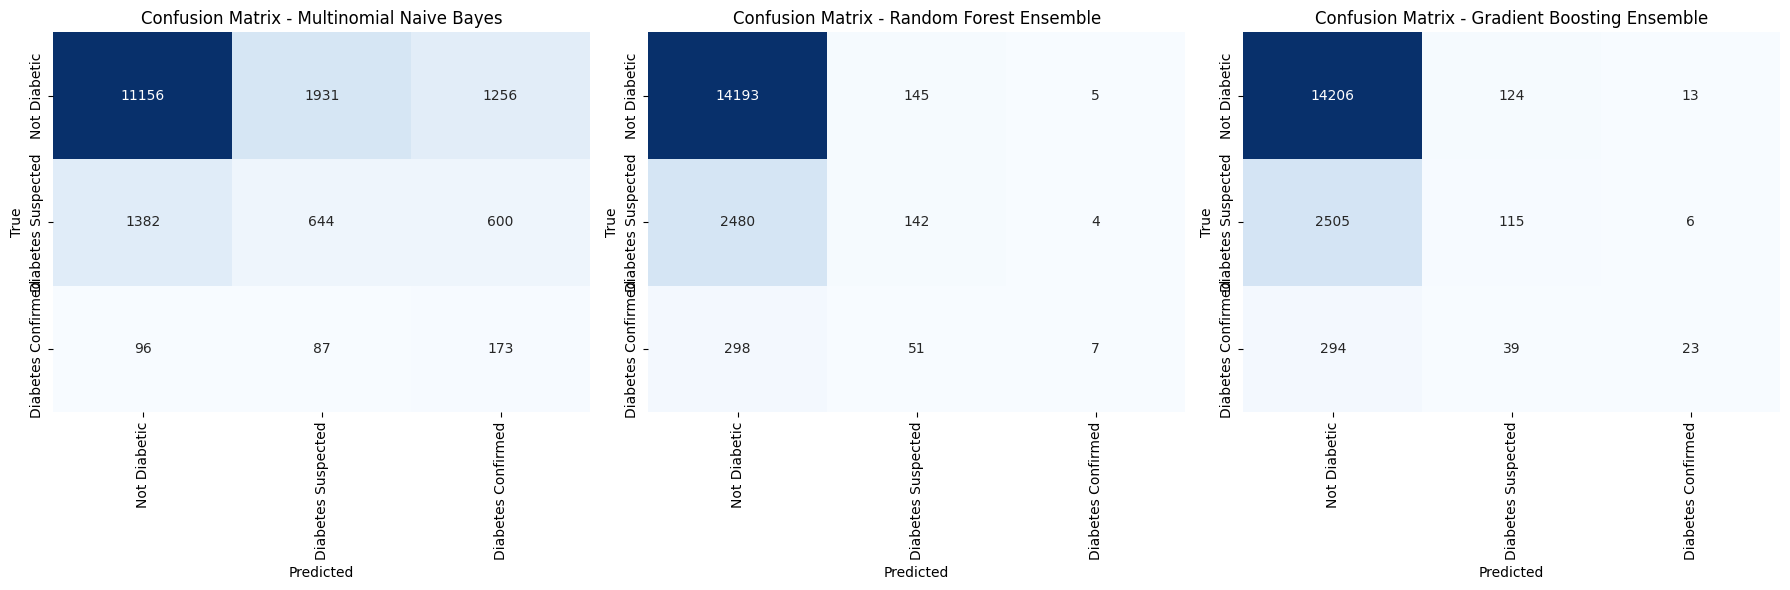

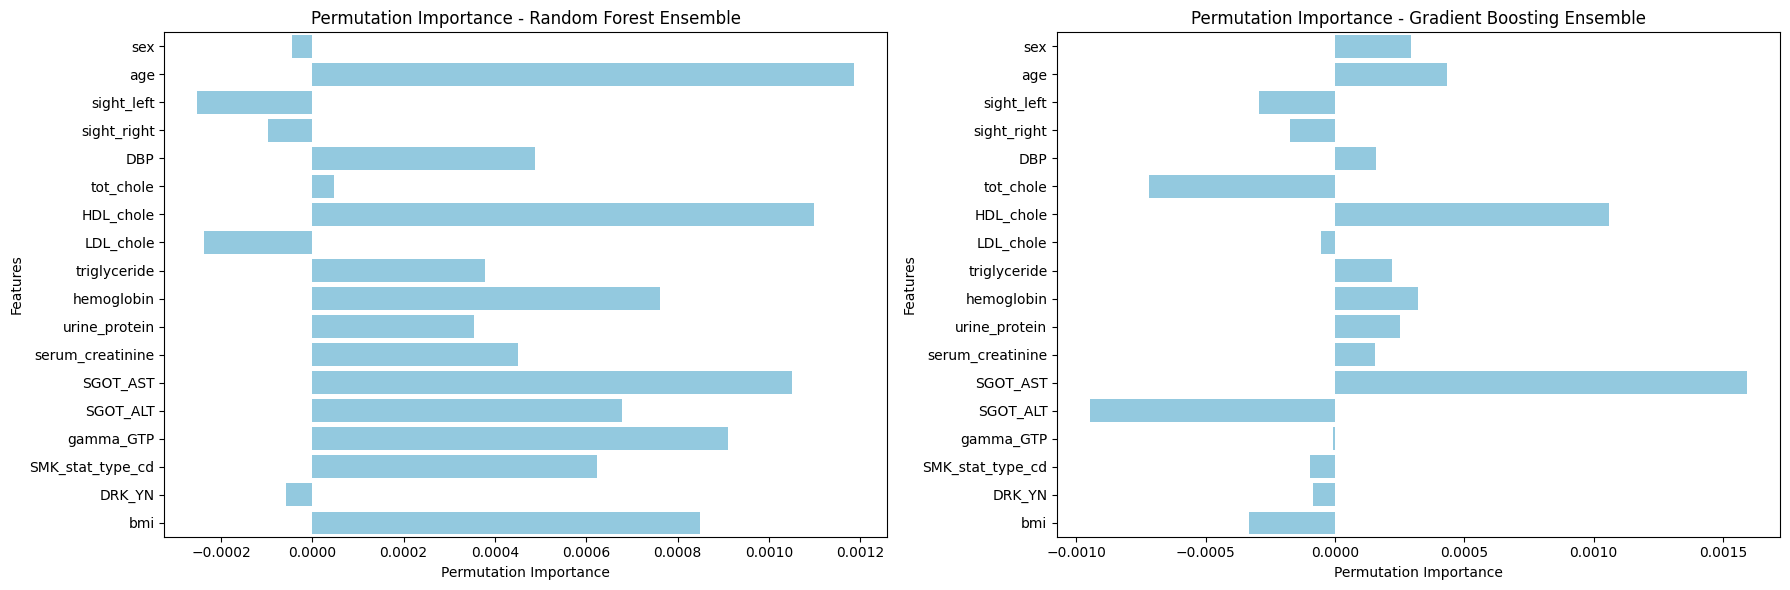

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.inspection import permutation_importance

# 데이터 프레임에서 독립 변수와 종속 변수를 분리
X = df.drop('diabete', axis=1)
y = df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 멀티노미얼 나이브 베이즈 모델 초기화
mnb_model = MultinomialNB()

# 랜덤 포레스트 모델 초기화
rf_model = RandomForestClassifier(random_state=42)

# 그래디언트 부스팅 모델 초기화
gb_model = GradientBoostingClassifier(random_state=42)

# 앙상블 모델 예측을 위한 멀티노미얼 나이브 베이즈 학습
mnb_model.fit(X_train, y_train)

# 랜덤 포레스트 앙상블 학습
rf_ensemble = RandomForestClassifier(n_estimators=100, random_state=42)
rf_ensemble.fit(X_train, y_train)

# 그래디언트 부스팅 앙상블 학습
gb_ensemble = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_ensemble.fit(X_train, y_train)

# 예측
y_pred_mnb = mnb_model.predict(X_test)
y_pred_rf = rf_ensemble.predict(X_test)
y_pred_gb = gb_ensemble.predict(X_test)

# 정확도 출력
accuracy_mnb = metrics.accuracy_score(y_test, y_pred_mnb)
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
accuracy_gb = metrics.accuracy_score(y_test, y_pred_gb)

print(f'Multinomial Naive Bayes Accuracy: {accuracy_mnb}')
print(f'Random Forest Ensemble Accuracy: {accuracy_rf}')
print(f'Gradient Boosting Ensemble Accuracy: {accuracy_gb}')

# Permutation Importance 계산 (Random Forest)
result_rf = permutation_importance(rf_ensemble, X_test, y_test, n_repeats=30, random_state=42)

# Permutation Importance 계산 (Gradient Boosting)
result_gb = permutation_importance(gb_ensemble, X_test, y_test, n_repeats=30, random_state=42)

# Permutation Importance 출력
print("\nPermutation Importance (Random Forest):")
for i, importance in enumerate(result_rf.importances_mean):
    print(f'Feature {i + 1}: {importance}')

print("\nPermutation Importance (Gradient Boosting):")
for i, importance in enumerate(result_gb.importances_mean):
    print(f'Feature {i + 1}: {importance}')

# 컨퓨전 매트릭스 출력
confusion_matrix_mnb = metrics.confusion_matrix(y_test, y_pred_mnb)
confusion_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
confusion_matrix_gb = metrics.confusion_matrix(y_test, y_pred_gb)

print("\nConfusion Matrix - Multinomial Naive Bayes:")
print(confusion_matrix_mnb)

print("\nConfusion Matrix - Random Forest Ensemble:")
print(confusion_matrix_rf)

print("\nConfusion Matrix - Gradient Boosting Ensemble:")
print(confusion_matrix_gb)

# 컨퓨전 매트릭스 시각화
plt.figure(figsize=(18, 6))

# 컨퓨전 매트릭스 (Multinomial Naive Bayes)
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix_mnb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Diabetic', 'Diabetes Suspected', 'Diabetes Confirmed'],
            yticklabels=['Not Diabetic', 'Diabetes Suspected', 'Diabetes Confirmed'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')

# 컨퓨전 매트릭스 (Random Forest Ensemble)
plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Diabetic', 'Diabetes Suspected', 'Diabetes Confirmed'],
            yticklabels=['Not Diabetic', 'Diabetes Suspected', 'Diabetes Confirmed'])
plt.title('Confusion Matrix - Random Forest Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')

# 컨퓨전 매트릭스 (Gradient Boosting Ensemble)
plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix_gb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Diabetic', 'Diabetes Suspected', 'Diabetes Confirmed'],
            yticklabels=['Not Diabetic', 'Diabetes Suspected', 'Diabetes Confirmed'])
plt.title('Confusion Matrix - Gradient Boosting Ensemble')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

# Permutation Importance 시각화
plt.figure(figsize=(18, 6))

# Permutation Importance (Random Forest)
plt.subplot(1, 2, 1)
sns.barplot(x=result_rf.importances_mean, y=feature_names, color='skyblue')
plt.title('Permutation Importance - Random Forest Ensemble')
plt.xlabel('Permutation Importance')
plt.ylabel('Features')

# Permutation Importance (Gradient Boosting)
plt.subplot(1, 2, 2)
sns.barplot(x=result_gb.importances_mean, y=feature_names, color='skyblue')
plt.title('Permutation Importance - Gradient Boosting Ensemble')
plt.xlabel('Permutation Importance')
plt.ylabel('Features')

plt.tight_layout()
plt.show()


## 4. 앙상블 2

In [59]:
!pip install --upgrade catboost
!pip install lightgbm

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1978
[LightGBM] [Info] Number of data points in the train set: 69297, number of used features: 18
[LightGBM] [Info] Start training from score -0.194176
[LightGBM] [Info] Start training from score -1.864240
[LightGBM] [Info] Start training from score -3.840969

Permutation Importance (Random Forest):
Feature 1: -4.425204425208736e-05
Feature 2: 0.0011871091871091589
Feature 3: -0.0002520442520442886
Feature 4: -9.812409812413788e-05
Feature 5: 0.00048677248677245395
Feature 6: 4.810004810001193e-05
Feature 7: 0.001098605098605073
Feature 8: -0.0002366522366522572
Feature 9: 0.0003790283790283566
Feature 10: 0.0007619047619047266
Feature 11: 0.0003540163540163251
Feature 12: 0.0004502164502164193
Feature 13: 0.0010505050505050203
Feature

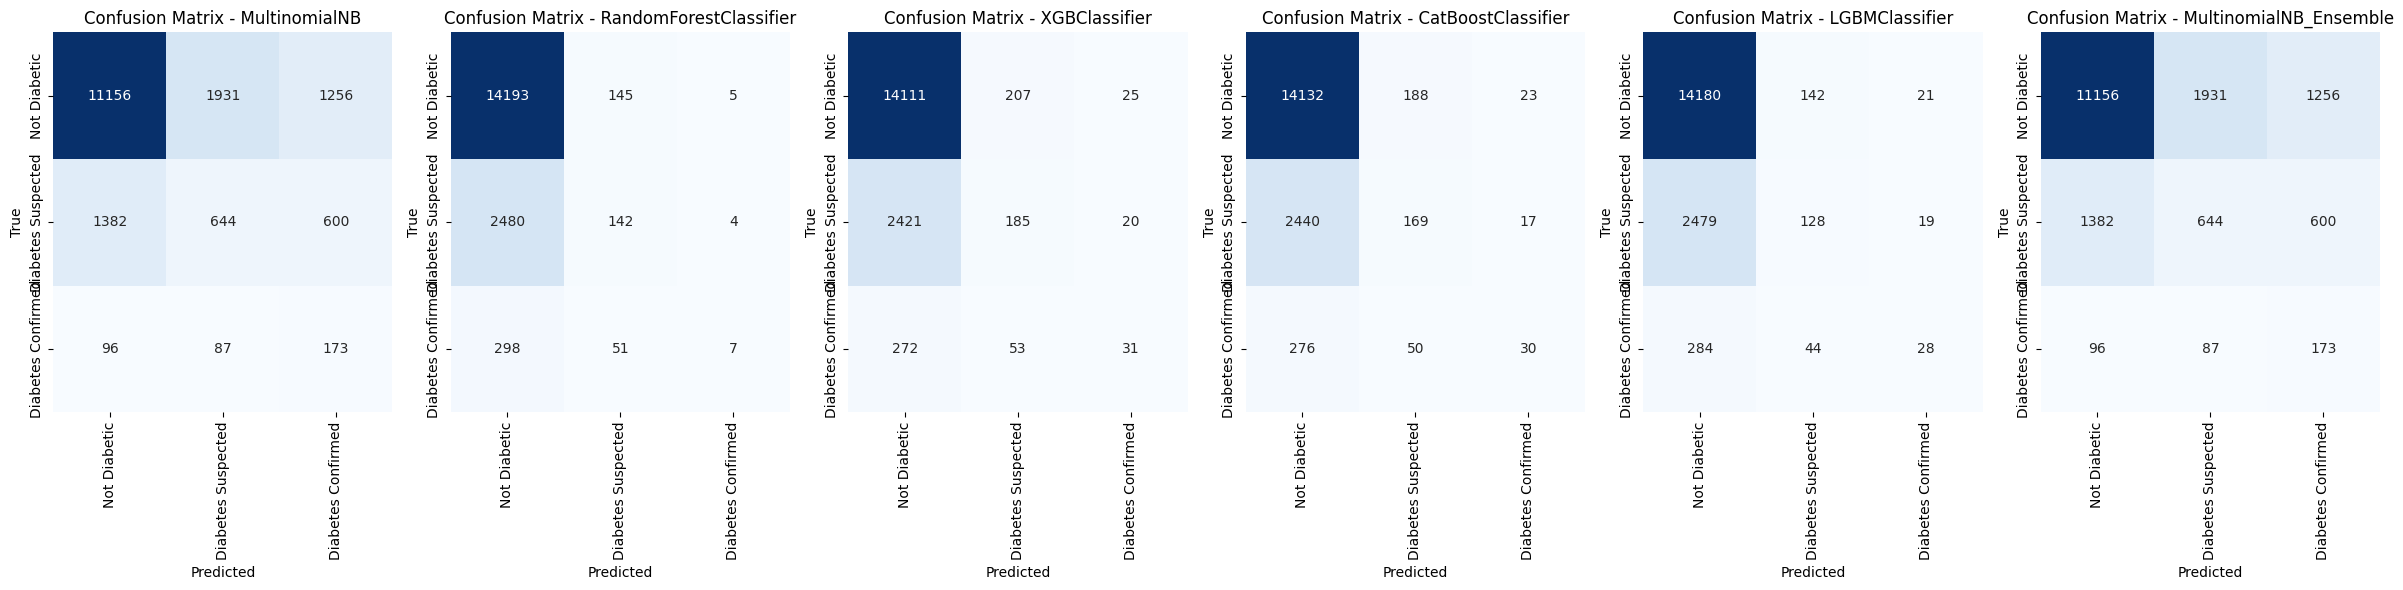


Classification Reports:
           MultinomialNB  RandomForestClassifier  XGBClassifier  \
precision       0.769450                0.765031       0.766598   
recall          0.691082                0.827821       0.826955   
f1-score        0.724617                0.765765       0.771344   
support     17325.000000            17325.000000   17325.000000   

           CatBoostClassifier  LGBMClassifier  MultinomialNB_Ensemble  
precision            0.766164        0.763120                0.769450  
recall               0.827186        0.827475                0.691082  
f1-score             0.769975        0.766364                0.724617  
support          17325.000000    17325.000000            17325.000000  


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.inspection import permutation_importance

# 데이터 프레임에서 독립 변수와 종속 변수를 분리
X = df.drop('diabete', axis=1)
y = df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 멀티노미얼 나이브 베이즈 모델 초기화
mnb_model = MultinomialNB()

# 랜덤 포레스트 모델 초기화
rf_model = RandomForestClassifier(random_state=42)

# XGBoost 모델 초기화
xgb_model = XGBClassifier(random_state=42)

# CatBoost 모델 초기화
catboost_model = CatBoostClassifier(random_state=42, verbose=False)

# LightGBM 모델 초기화
lgbm_model = LGBMClassifier(random_state=42)

# 각 모델과 멀티노미얼 나이브 베이즈의 앙상블을 위한 블렌딩
def blending(X_train, X_test, y_train, models):
    predictions = pd.DataFrame()

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions[model.__class__.__name__] = y_pred

    return predictions

# 앙상블을 위한 모델 리스트
models = [mnb_model, rf_model, xgb_model, catboost_model, lgbm_model]

# 블렌딩을 통한 앙상블 예측
ensemble_predictions = blending(X_train, X_test, y_train, models)

# 멀티노미얼 나이브 베이즈와의 앙상블 추가
ensemble_predictions['MultinomialNB_Ensemble'] = mnb_model.predict(X_test)

# Classification Report을 판다스 데이터프레임으로 출력
classification_reports = pd.DataFrame()

for col in ensemble_predictions.columns:
    report = metrics.classification_report(y_test, ensemble_predictions[col], output_dict=True)
    classification_reports[col] = pd.Series(report['weighted avg'])

# Permutation Importance 계산 (Random Forest)
result_rf = permutation_importance(rf_model, X_test, y_test, n_repeats=30, random_state=42)

# Permutation Importance 계산 (XGBoost)
result_xgb = permutation_importance(xgb_model, X_test, y_test, n_repeats=30, random_state=42)

# Permutation Importance 계산 (CatBoost)
result_catboost = permutation_importance(catboost_model, X_test, y_test, n_repeats=30, random_state=42)

# Permutation Importance 계산 (LightGBM)
result_lgbm = permutation_importance(lgbm_model, X_test, y_test, n_repeats=30, random_state=42)

# Permutation Importance 출력
print("\nPermutation Importance (Random Forest):")
for i, importance in enumerate(result_rf.importances_mean):
    print(f'Feature {i + 1}: {importance}')

print("\nPermutation Importance (XGBoost):")
for i, importance in enumerate(result_xgb.importances_mean):
    print(f'Feature {i + 1}: {importance}')

print("\nPermutation Importance (CatBoost):")
for i, importance in enumerate(result_catboost.importances_mean):
    print(f'Feature {i + 1}: {importance}')

print("\nPermutation Importance (LightGBM):")
for i, importance in enumerate(result_lgbm.importances_mean):
    print(f'Feature {i + 1}: {importance}')

# 컨퓨전 매트릭스 시각화
plt.figure(figsize=(24, 6))

for i, col in enumerate(ensemble_predictions.columns, 1):
    plt.subplot(1, len(ensemble_predictions.columns), i)
    sns.heatmap(metrics.confusion_matrix(y_test, ensemble_predictions[col]), annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Diabetic', 'Diabetes Suspected', 'Diabetes Confirmed'],
                yticklabels=['Not Diabetic', 'Diabetes Suspected', 'Diabetes Confirmed'])
    plt.title(f'Confusion Matrix - {col}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

# Classification Report 출력
print("\nClassification Reports:")
print(classification_reports)




### 결과출력

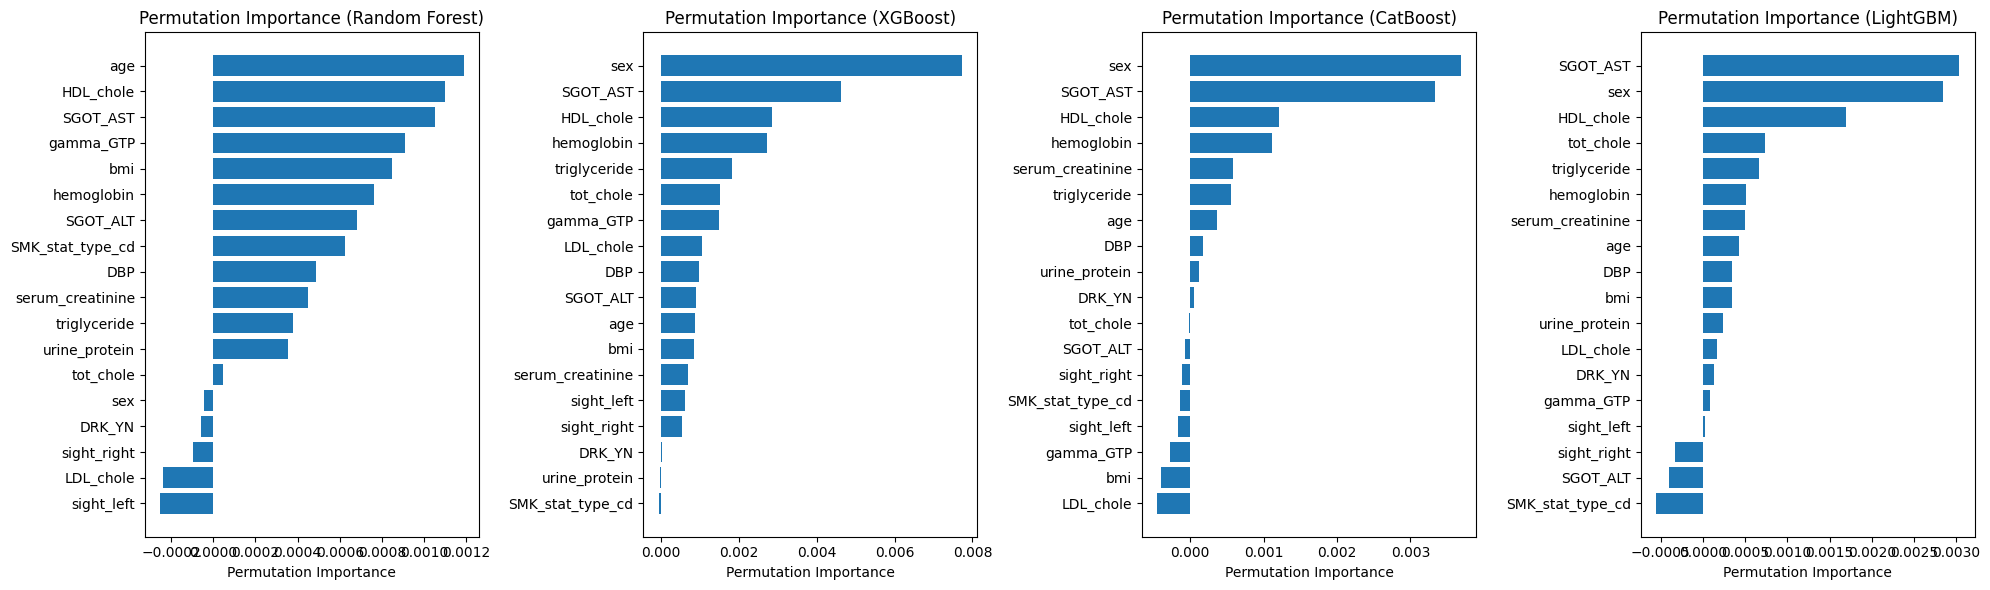

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# 퍼뮤테이션 임포턴스 시각화 함수
def plot_perm_importance(ax, features, importances, title):
    indices = np.argsort(importances)

    ax.barh(range(len(indices)), importances[indices], align='center')
    ax.set_yticks(range(len(indices)))
    ax.set_yticklabels([features[i] for i in indices])
    ax.set_xlabel('Permutation Importance')
    ax.set_title(title)

# 각 모델의 퍼뮤테이션 임포턴스를 가로로 나란히 출력
fig, axs = plt.subplots(1, 4, figsize=(20, 6))  # 1행 4열의 서브플롯 생성

# axs는 각 모델에 대한 축을 나타냄
plot_perm_importance(axs[0], X_test.columns, result_rf.importances_mean, 'Permutation Importance (Random Forest)')
plot_perm_importance(axs[1], X_test.columns, result_xgb.importances_mean, 'Permutation Importance (XGBoost)')
plot_perm_importance(axs[2], X_test.columns, result_catboost.importances_mean, 'Permutation Importance (CatBoost)')
plot_perm_importance(axs[3], X_test.columns, result_lgbm.importances_mean, 'Permutation Importance (LightGBM)')

plt.tight_layout()  # 레이아웃 조정
plt.show()


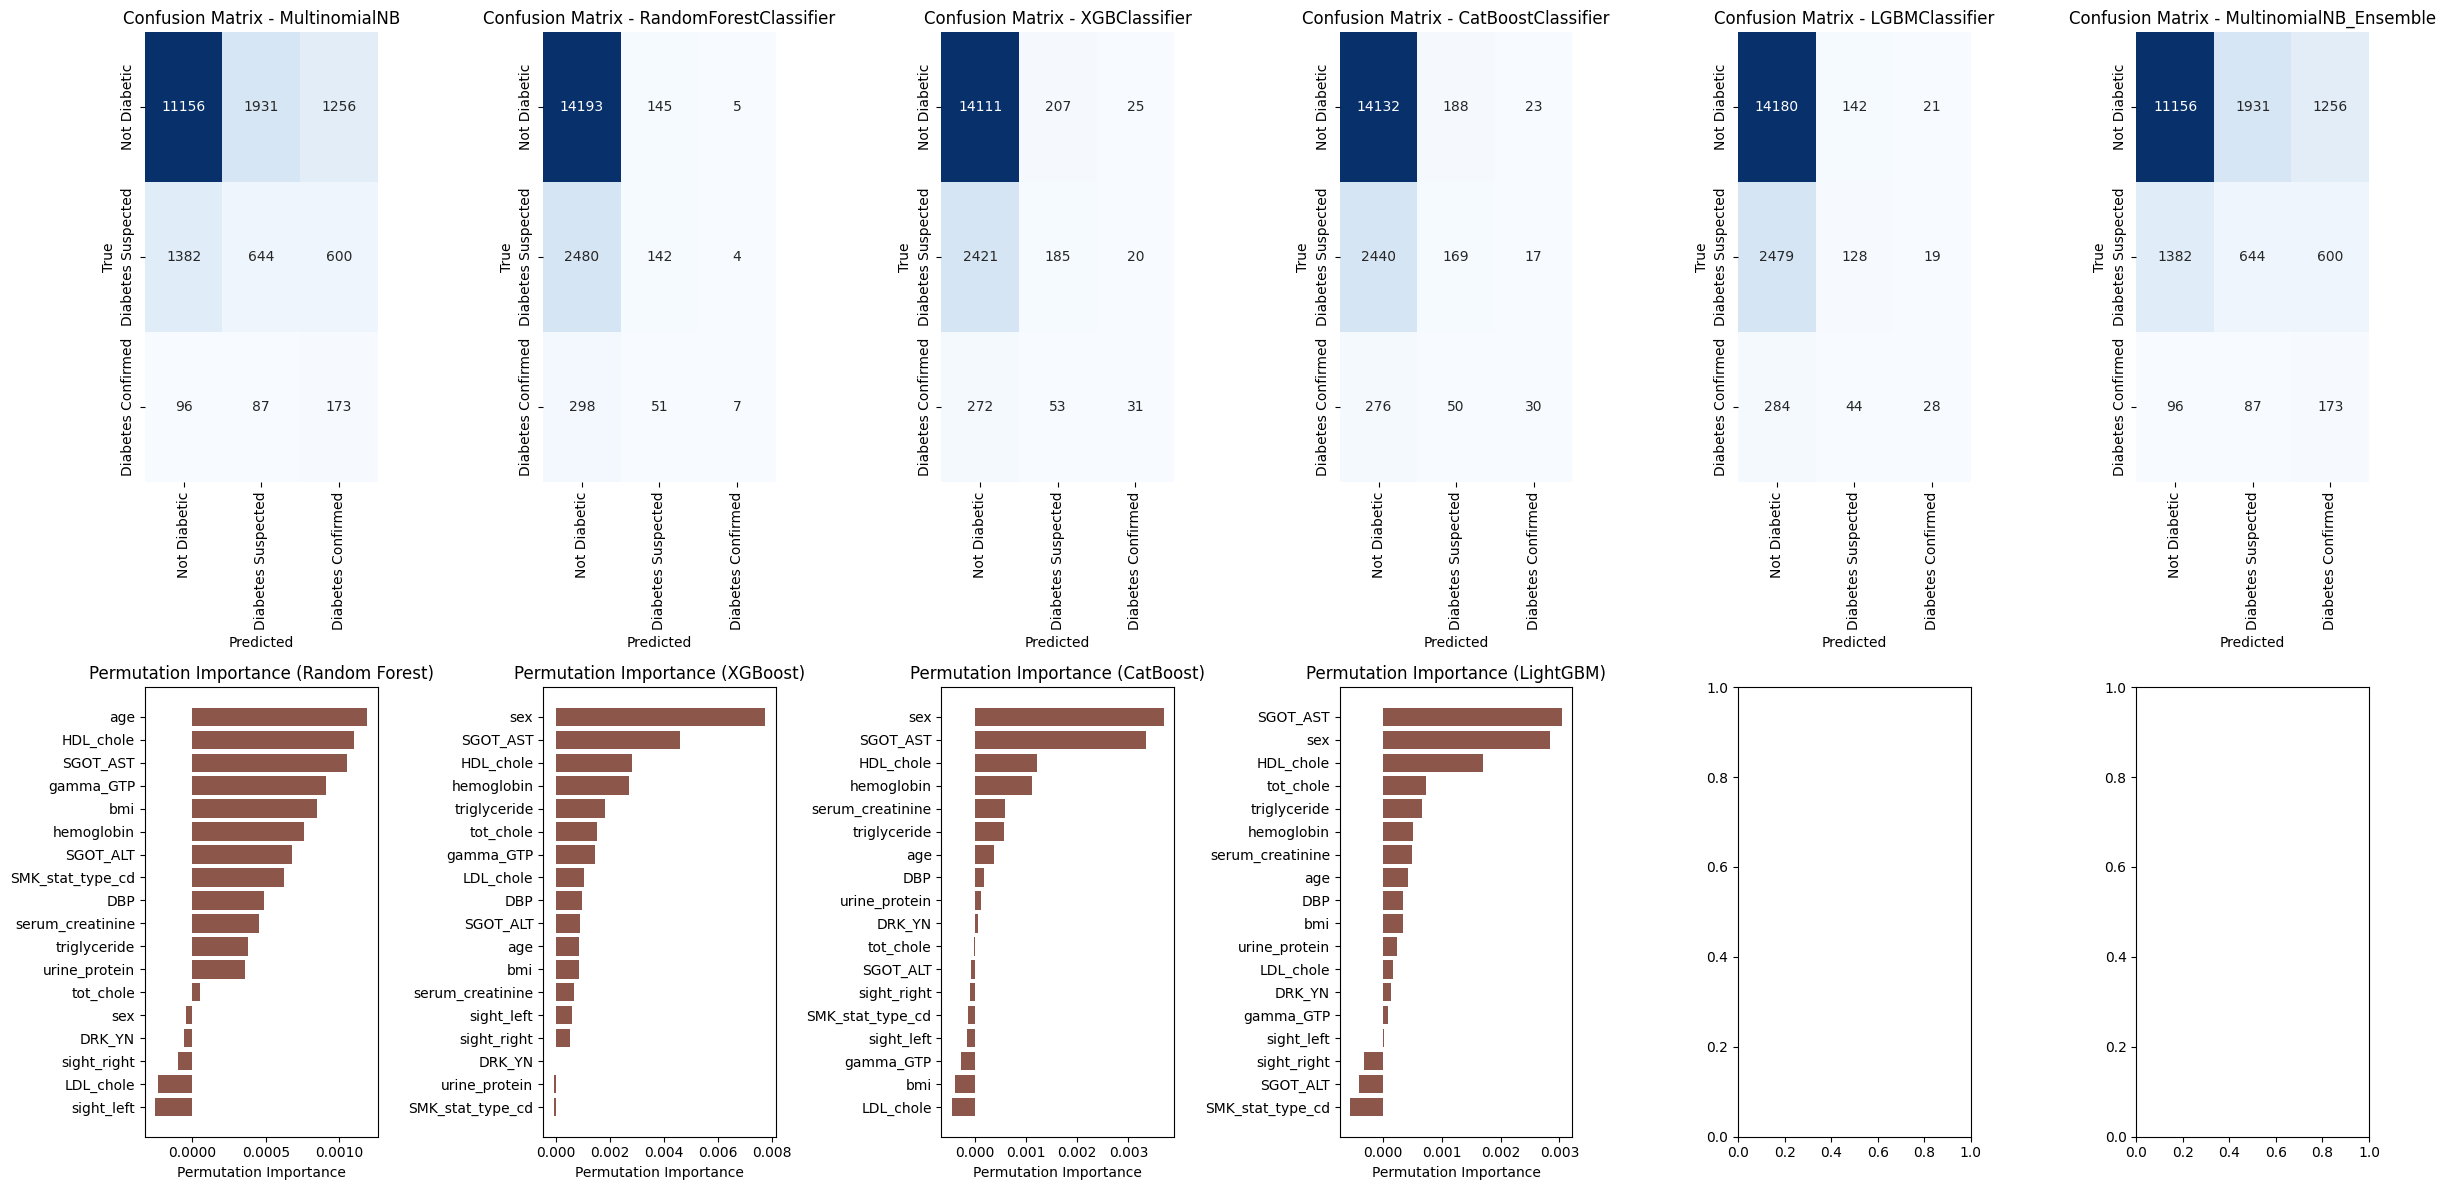

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 각 모델의 컨퓨전 매트릭스 및 퍼뮤테이션 임포턴스 시각화
fig, axes = plt.subplots(nrows=2, ncols=len(ensemble_predictions.columns), figsize=(24, 12))

for i, col in enumerate(ensemble_predictions.columns):
        # i가 0이거나 5일 때는 건너뛰기
    if i == 0 or i == 5:
        continue
    # 컨퓨전 매트릭스 시각화
    sns.heatmap(metrics.confusion_matrix(y_test, ensemble_predictions[col]), annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Diabetic', 'Diabetes Suspected', 'Diabetes Confirmed'],
                yticklabels=['Not Diabetic', 'Diabetes Suspected', 'Diabetes Confirmed'], ax=axes[0, i])
    axes[0, i].set_title(f'Confusion Matrix - {col}')
    axes[0, i].set_xlabel('Predicted')
    axes[0, i].set_ylabel('True')

    # 퍼뮤테이션 임포턴스 시각화
    indices_rf = np.argsort(result_rf.importances_mean)
    indices_xgb = np.argsort(result_xgb.importances_mean)
    indices_catboost = np.argsort(result_catboost.importances_mean)
    indices_lgbm = np.argsort(result_lgbm.importances_mean)

    axes[1, 0].barh(range(len(indices_rf)), result_rf.importances_mean[indices_rf], align='center')
    axes[1, 0].set_yticks(range(len(indices_rf)))
    axes[1, 0].set_yticklabels([X_test.columns[i] for i in indices_rf])
    axes[1, 0].set_xlabel('Permutation Importance')
    axes[1, 0].set_title('Permutation Importance (Random Forest)')

    axes[1, 1].barh(range(len(indices_xgb)), result_xgb.importances_mean[indices_xgb], align='center')
    axes[1, 1].set_yticks(range(len(indices_xgb)))
    axes[1, 1].set_yticklabels([X_test.columns[i] for i in indices_xgb])
    axes[1, 1].set_xlabel('Permutation Importance')
    axes[1, 1].set_title('Permutation Importance (XGBoost)')

    axes[1, 2].barh(range(len(indices_catboost)), result_catboost.importances_mean[indices_catboost], align='center')
    axes[1, 2].set_yticks(range(len(indices_catboost)))
    axes[1, 2].set_yticklabels([X_test.columns[i] for i in indices_catboost])
    axes[1, 2].set_xlabel('Permutation Importance')
    axes[1, 2].set_title('Permutation Importance (CatBoost)')

    axes[1, 3].barh(range(len(indices_lgbm)), result_lgbm.importances_mean[indices_lgbm], align='center')
    axes[1, 3].set_yticks(range(len(indices_lgbm)))
    axes[1, 3].set_yticklabels([X_test.columns[i] for i in indices_lgbm])
    axes[1, 3].set_xlabel('Permutation Importance')
    axes[1, 3].set_title('Permutation Importance (LightGBM)')

plt.tight_layout()
plt.show()


In [96]:
# 각 모델의 Classification Report 출력
for col in ensemble_predictions.columns:
    report = metrics.classification_report(y_test, ensemble_predictions[col], target_names=['Not Diabetic', 'Diabetes Suspected', 'Diabetes Confirmed'])
    print(f"\nClassification Report - {col}:\n{report}")



Classification Report - MultinomialNB:
                    precision    recall  f1-score   support

      Not Diabetic       0.88      0.78      0.83     14343
Diabetes Suspected       0.24      0.25      0.24      2626
Diabetes Confirmed       0.09      0.49      0.15       356

          accuracy                           0.69     17325
         macro avg       0.40      0.50      0.41     17325
      weighted avg       0.77      0.69      0.72     17325


Classification Report - RandomForestClassifier:
                    precision    recall  f1-score   support

      Not Diabetic       0.84      0.99      0.91     14343
Diabetes Suspected       0.42      0.05      0.10      2626
Diabetes Confirmed       0.44      0.02      0.04       356

          accuracy                           0.83     17325
         macro avg       0.56      0.35      0.35     17325
      weighted avg       0.77      0.83      0.77     17325


Classification Report - XGBClassifier:
                    preci

In [62]:
# Confusion Matrix 텍스트 출력
print("\nConfusion Matrices (Text):")
for col in ensemble_predictions.columns:
    matrix_text = metrics.confusion_matrix(y_test, ensemble_predictions[col])
    print(f'\nConfusion Matrix - {col}:\n{matrix_text}')



Confusion Matrices (Text):

Confusion Matrix - MultinomialNB:
[[11156  1931  1256]
 [ 1382   644   600]
 [   96    87   173]]

Confusion Matrix - RandomForestClassifier:
[[14193   145     5]
 [ 2480   142     4]
 [  298    51     7]]

Confusion Matrix - XGBClassifier:
[[14111   207    25]
 [ 2421   185    20]
 [  272    53    31]]

Confusion Matrix - CatBoostClassifier:
[[14132   188    23]
 [ 2440   169    17]
 [  276    50    30]]

Confusion Matrix - LGBMClassifier:
[[14180   142    21]
 [ 2479   128    19]
 [  284    44    28]]

Confusion Matrix - MultinomialNB_Ensemble:
[[11156  1931  1256]
 [ 1382   644   600]
 [   96    87   173]]


## 5. 불균형 해소 시도

Under Ratio: 1, Over Ratio: 1, F1 Score: 0.7325394981570825
Under Ratio: 1, Over Ratio: 2, F1 Score: 0.7306069822241086
Under Ratio: 1, Over Ratio: 3, F1 Score: 0.7305634648293663
Under Ratio: 1, Over Ratio: 4, F1 Score: 0.728621887432948
Under Ratio: 1, Over Ratio: 5, F1 Score: 0.7283901168549384
Under Ratio: 1, Over Ratio: 6, F1 Score: 0.7287169033732382
Under Ratio: 1, Over Ratio: 7, F1 Score: 0.7281984172632247
Under Ratio: 1, Over Ratio: 8, F1 Score: 0.7268914142157119
Under Ratio: 1, Over Ratio: 9, F1 Score: 0.7263852637718624
Under Ratio: 1, Over Ratio: 10, F1 Score: 0.7266499014583513


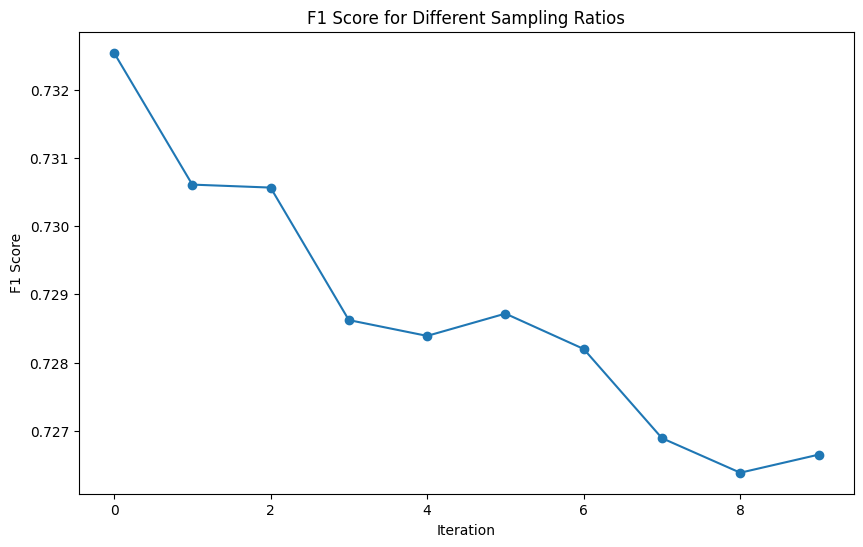

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# 데이터 프레임에서 독립 변수와 종속 변수를 분리
X = df.drop('diabete', axis=1)
y = df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 성능 기록을 위한 리스트 초기화
f1_scores = []

# 다양한 오버샘플링과 언더샘플링 비율을 시도
for under_ratio in range(1, 11):  # 언더샘플링 비율
    for over_ratio in range(1, 11):  # 오버샘플링 비율
        # Check if the requested number of samples is less than or equal to the original number of samples
        if (under_ratio * len(y_train[y_train == 0]) <= len(y_train)) and (over_ratio * 500 <= len(y_train)):
            under_sampler = RandomUnderSampler(sampling_strategy={0: under_ratio * len(y_train[y_train == 0]), 1: 500, 2: 500}, random_state=1)
            X_rs, y_rs = under_sampler.fit_resample(X_train, y_train)

            over_sampler = RandomOverSampler(sampling_strategy={0: len(y_train[y_train == 0]), 1: over_ratio * 500, 2: over_ratio * 500}, random_state=1)
            X_rs, y_rs = over_sampler.fit_resample(X_rs, y_rs)

            # 멀티노미얼 나이브 베이즈 모델 초기화 (라플라스 스무딩 적용)
            alpha_value = 1.0e-10  # 라플라스 스무딩 파라미터
            mnb_model = MultinomialNB(alpha=alpha_value, force_alpha=True)

            # 모델 학습
            mnb_model.fit(X_rs, y_rs)

            # 예측
            y_pred = mnb_model.predict(X_test)

            # F1 점수 계산 및 기록
            f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
            f1_scores.append(f1_score)

            # 현재 조합의 성능 출력
            print(f"Under Ratio: {under_ratio}, Over Ratio: {over_ratio}, F1 Score: {f1_score}")

# 선형 차트로 시각화
plt.figure(figsize=(10, 6))
plt.plot(f1_scores, marker='o', linestyle='-')
plt.title('F1 Score for Different Sampling Ratios')
plt.xlabel('Iteration')
plt.ylabel('F1 Score')
plt.show()


After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 17120)
The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 17120)
The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 17120)
The default value for `force_alpha` will change to

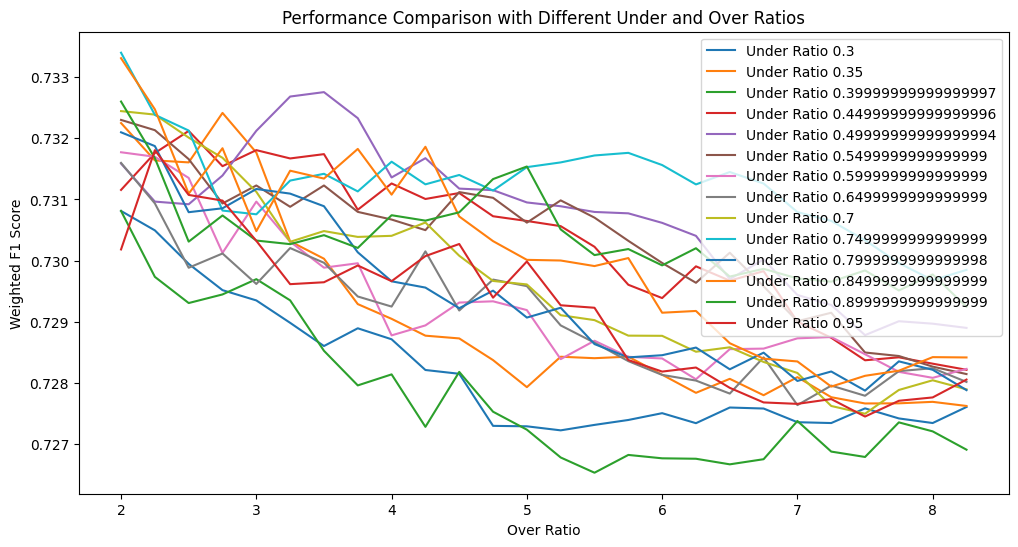

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# 설정
under_ratios = np.arange(0.3, 1.0, 0.05)
over_ratios = np.arange(2, 8.5, 0.25)

# 결과 저장
results = []

# 데이터 프레임에서 독립 변수와 종속 변수를 분리
X = df.drop('diabete', axis=1)
y = df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 (라플라스 스무딩 적용)
alpha_value = 0  # 라플라스 스무딩 파라미터
mnb_model = MultinomialNB(alpha=alpha_value)

# 실험
for under_ratio in under_ratios:
    for over_ratio in over_ratios:
        # 언더샘플링
        under_sampler = RandomUnderSampler(sampling_strategy={0: int(under_ratio * len(y_train[y_train == 0])), 1: 500, 2: 500}, random_state=1)
        X_rs, y_rs = under_sampler.fit_resample(X_train, y_train)

        # 오버샘플링
        over_sampler = RandomOverSampler(sampling_strategy={0: len(y_train[y_train == 0]), 1: int(over_ratio * 500), 2: int(over_ratio * 500)}, random_state=1)
        X_rs, y_rs = over_sampler.fit_resample(X_rs, y_rs)

        # 모델 학습
        mnb_model.fit(X_rs, y_rs)

        # 예측
        y_pred = mnb_model.predict(X_test)

        # F1 Score 계산 및 저장
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append((under_ratio, over_ratio, f1))

# 결과를 선형 그래프로 비교
plt.figure(figsize=(12, 6))

for under_ratio in under_ratios:
    subset = [result for result in results if result[0] == under_ratio]
    plt.plot([result[1] for result in subset], [result[2] for result in subset], label=f'Under Ratio {under_ratio}')

plt.title('Performance Comparison with Different Under and Over Ratios')
plt.xlabel('Over Ratio')
plt.ylabel('Weighted F1 Score')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# 설정
under_ratios = np.arange(0.6, 0.9, 0.05)
over_ratios = np.arange(2, 4, 0.05)

# 결과 저장
results = []

# 데이터 프레임에서 독립 변수와 종속 변수를 분리
X = df.drop('diabete', axis=1)
y = df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 (라플라스 스무딩 적용)
alpha_value = 0  # 라플라스 스무딩 파라미터
mnb_model = MultinomialNB(alpha=alpha_value)

# 실험
for under_ratio in under_ratios:
    for over_ratio in over_ratios:
        # 언더샘플링
        under_sampler = RandomUnderSampler(sampling_strategy={0: int(under_ratio * len(y_train[y_train == 0])), 1: 500, 2: 500}, random_state=1)
        X_rs, y_rs = under_sampler.fit_resample(X_train, y_train)

        # 오버샘플링
        over_sampler = RandomOverSampler(sampling_strategy={0: len(y_train[y_train == 0]), 1: int(over_ratio * 500), 2: int(over_ratio * 500)}, random_state=1)
        X_rs, y_rs = over_sampler.fit_resample(X_rs, y_rs)

        # 모델 학습
        mnb_model.fit(X_rs, y_rs)

        # 예측
        y_pred = mnb_model.predict(X_test)

        # F1 Score 계산 및 저장
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append((under_ratio, over_ratio, f1))

# 결과를 선형 그래프로 비교
plt.figure(figsize=(12, 6))

for under_ratio in under_ratios:
    subset = [result for result in results if result[0] == under_ratio]
    plt.plot([result[1] for result in subset], [result[2] for result in subset], label=f'Under Ratio {under_ratio}')

plt.title('Performance Comparison with Different Under and Over Ratios')
plt.xlabel('Over Ratio')
plt.ylabel('Weighted F1 Score')
plt.legend()
plt.show()


After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 5706)
The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 5706)
The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 5706)
The default value for `force_alpha` will change to `T

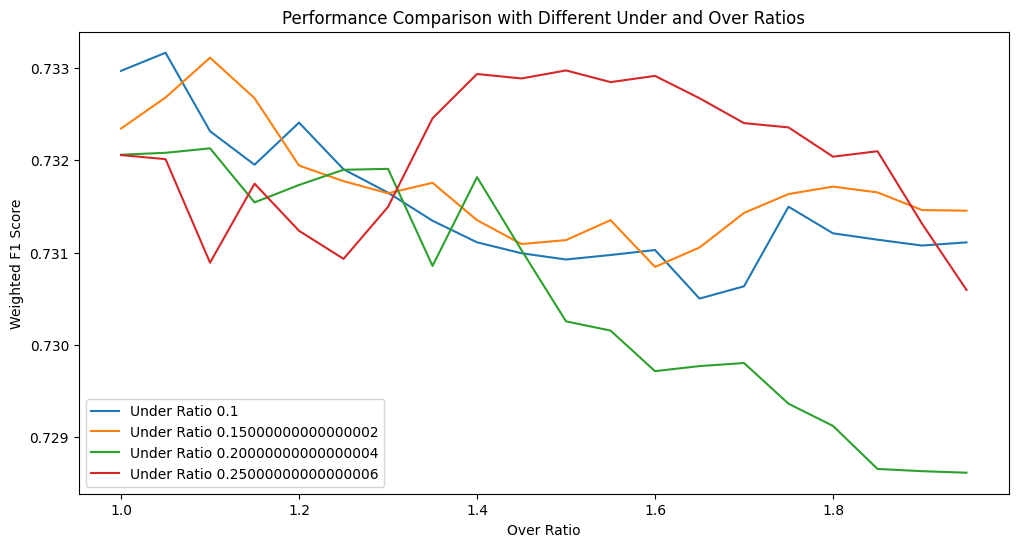

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# 설정
under_ratios = np.arange(0.1, 0.3, 0.05)
over_ratios = np.arange(1, 2, 0.05)

# 결과 저장
results = []

# 데이터 프레임에서 독립 변수와 종속 변수를 분리
X = df.drop('diabete', axis=1)
y = df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 (라플라스 스무딩 적용)
alpha_value = 0  # 라플라스 스무딩 파라미터
mnb_model = MultinomialNB(alpha=alpha_value)

# 실험
for under_ratio in under_ratios:
    for over_ratio in over_ratios:
        # 언더샘플링
        under_sampler = RandomUnderSampler(sampling_strategy={0: int(under_ratio * len(y_train[y_train == 0])), 1: 500, 2: 500}, random_state=1)
        X_rs, y_rs = under_sampler.fit_resample(X_train, y_train)

        # 오버샘플링
        over_sampler = RandomOverSampler(sampling_strategy={0: len(y_train[y_train == 0]), 1: int(over_ratio * 500), 2: int(over_ratio * 500)}, random_state=1)
        X_rs, y_rs = over_sampler.fit_resample(X_rs, y_rs)

        # 모델 학습
        mnb_model.fit(X_rs, y_rs)

        # 예측
        y_pred = mnb_model.predict(X_test)

        # F1 Score 계산 및 저장
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append((under_ratio, over_ratio, f1))

# 결과를 선형 그래프로 비교
plt.figure(figsize=(12, 6))

for under_ratio in under_ratios:
    subset = [result for result in results if result[0] == under_ratio]
    plt.plot([result[1] for result in subset], [result[2] for result in subset], label=f'Under Ratio {under_ratio}')

plt.title('Performance Comparison with Different Under and Over Ratios')
plt.xlabel('Over Ratio')
plt.ylabel('Weighted F1 Score')
plt.legend()
plt.show()


After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 13696)
The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 13696)
The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 13696)
The default value for `force_alpha` will change to

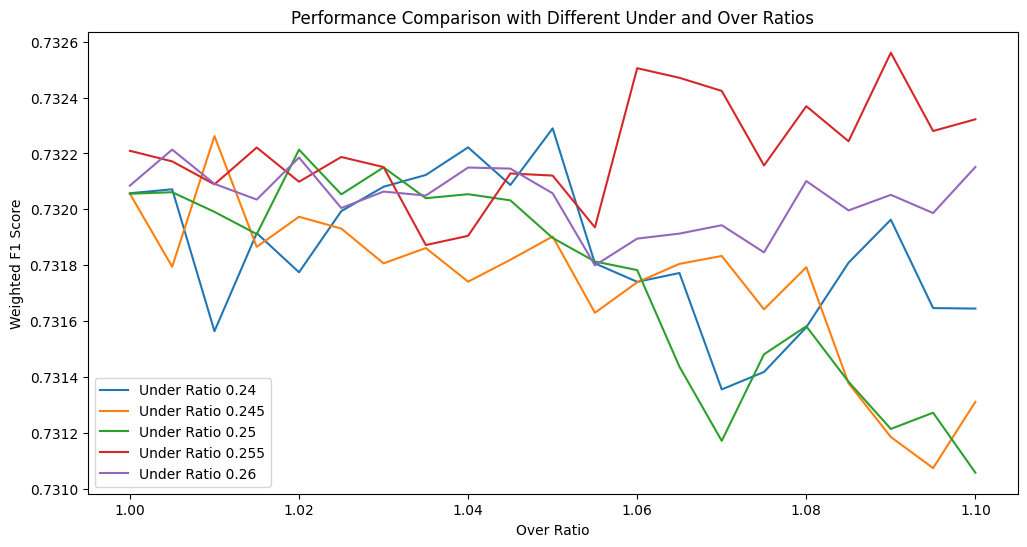

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# 설정
under_ratios = np.arange(0.24, 0.26, 0.005)
over_ratios = np.arange(1, 1.1, 0.005)

# 결과 저장
results = []

# 데이터 프레임에서 독립 변수와 종속 변수를 분리
X = df.drop('diabete', axis=1)
y = df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 (라플라스 스무딩 적용)
alpha_value = 0  # 라플라스 스무딩 파라미터
mnb_model = MultinomialNB(alpha=alpha_value)

# 실험
for under_ratio in under_ratios:
    for over_ratio in over_ratios:
        # 언더샘플링
        under_sampler = RandomUnderSampler(sampling_strategy={0: int(under_ratio * len(y_train[y_train == 0])), 1: 500, 2: 500}, random_state=1)
        X_rs, y_rs = under_sampler.fit_resample(X_train, y_train)

        # 오버샘플링
        over_sampler = RandomOverSampler(sampling_strategy={0: len(y_train[y_train == 0]), 1: int(over_ratio * 500), 2: int(over_ratio * 500)}, random_state=1)
        X_rs, y_rs = over_sampler.fit_resample(X_rs, y_rs)

        # 모델 학습
        mnb_model.fit(X_rs, y_rs)

        # 예측
        y_pred = mnb_model.predict(X_test)

        # F1 Score 계산 및 저장
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append((under_ratio, over_ratio, f1))

# 결과를 선형 그래프로 비교
plt.figure(figsize=(12, 6))

for under_ratio in under_ratios:
    subset = [result for result in results if result[0] == under_ratio]
    plt.plot([result[1] for result in subset], [result[2] for result in subset], label=f'Under Ratio {under_ratio}')

plt.title('Performance Comparison with Different Under and Over Ratios')
plt.xlabel('Over Ratio')
plt.ylabel('Weighted F1 Score')
plt.legend()
plt.show()


After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 54213)
The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 54213)
The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 54213)
The default value for `force_alpha` will change to

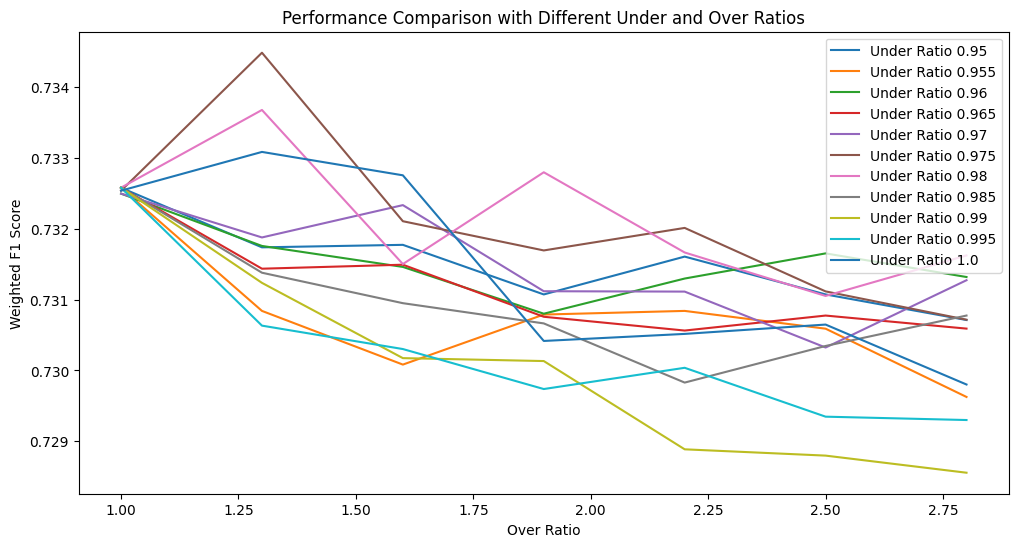

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# 설정
under_ratios = np.arange(0.95, 1.0, 0.005)
over_ratios = np.arange(1, 3, 0.3)

# 결과 저장
results = []

# 데이터 프레임에서 독립 변수와 종속 변수를 분리
X = df.drop('diabete', axis=1)
y = df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 (라플라스 스무딩 적용)
alpha_value = 0  # 라플라스 스무딩 파라미터
mnb_model = MultinomialNB(alpha=alpha_value)

# 실험
for under_ratio in under_ratios:
    for over_ratio in over_ratios:
        # 언더샘플링
        under_sampler = RandomUnderSampler(sampling_strategy={0: int(under_ratio * len(y_train[y_train == 0])), 1: 500, 2: 500}, random_state=1)
        X_rs, y_rs = under_sampler.fit_resample(X_train, y_train)

        # 오버샘플링
        over_sampler = RandomOverSampler(sampling_strategy={0: len(y_train[y_train == 0]), 1: int(over_ratio * 500), 2: int(over_ratio * 500)}, random_state=1)
        X_rs, y_rs = over_sampler.fit_resample(X_rs, y_rs)

        # 모델 학습
        mnb_model.fit(X_rs, y_rs)

        # 예측
        y_pred = mnb_model.predict(X_test)

        # F1 Score 계산 및 저장
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append((under_ratio, over_ratio, f1))

# 결과를 선형 그래프로 비교
plt.figure(figsize=(12, 6))

for under_ratio in under_ratios:
    subset = [result for result in results if result[0] == under_ratio]
    plt.plot([result[1] for result in subset], [result[2] for result in subset], label=f'Under Ratio {under_ratio}')

plt.title('Performance Comparison with Different Under and Over Ratios')
plt.xlabel('Over Ratio')
plt.ylabel('Weighted F1 Score')
plt.legend()
plt.show()


After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 54213)
The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 54213)
The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 54213)
The default value for `force_alpha` will change to

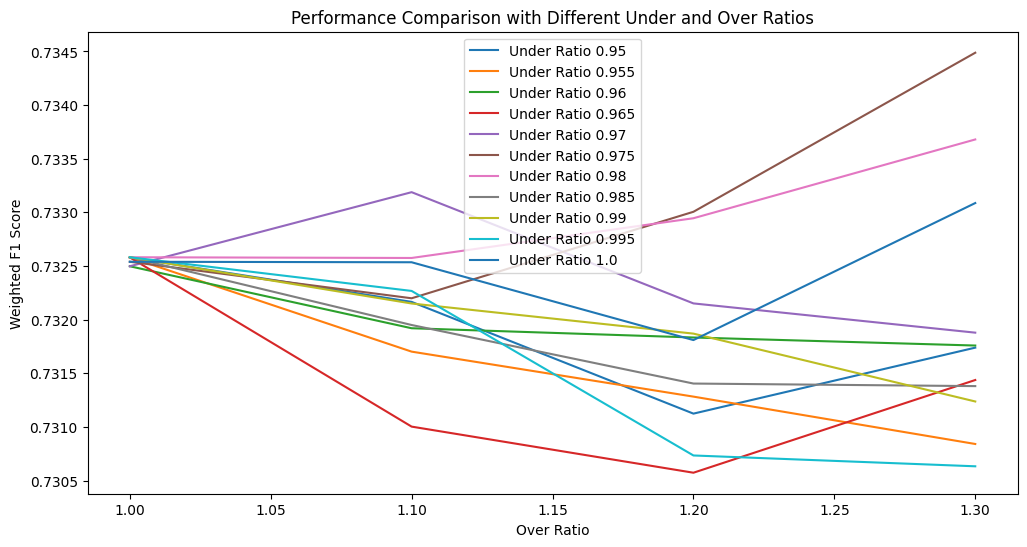

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# 설정
under_ratios = np.arange(0.95, 1.0, 0.005)
over_ratios = np.arange(1, 1.3, 0.1)

# 결과 저장
results = []

# 데이터 프레임에서 독립 변수와 종속 변수를 분리
X = df.drop('diabete', axis=1)
y = df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 (라플라스 스무딩 적용)
alpha_value = 0  # 라플라스 스무딩 파라미터
mnb_model = MultinomialNB(alpha=alpha_value)

# 실험
for under_ratio in under_ratios:
    for over_ratio in over_ratios:
        # 언더샘플링
        under_sampler = RandomUnderSampler(sampling_strategy={0: int(under_ratio * len(y_train[y_train == 0])), 1: 500, 2: 500}, random_state=1)
        X_rs, y_rs = under_sampler.fit_resample(X_train, y_train)

        # 오버샘플링
        over_sampler = RandomOverSampler(sampling_strategy={0: len(y_train[y_train == 0]), 1: int(over_ratio * 500), 2: int(over_ratio * 500)}, random_state=1)
        X_rs, y_rs = over_sampler.fit_resample(X_rs, y_rs)

        # 모델 학습
        mnb_model.fit(X_rs, y_rs)

        # 예측
        y_pred = mnb_model.predict(X_test)

        # F1 Score 계산 및 저장
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append((under_ratio, over_ratio, f1))

# 결과를 선형 그래프로 비교
plt.figure(figsize=(12, 6))

for under_ratio in under_ratios:
    subset = [result for result in results if result[0] == under_ratio]
    plt.plot([result[1] for result in subset], [result[2] for result in subset], label=f'Under Ratio {under_ratio}')

plt.title('Performance Comparison with Different Under and Over Ratios')
plt.xlabel('Over Ratio')
plt.ylabel('Weighted F1 Score')
plt.legend()
plt.show()


After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 54213)
The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 54213)
The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
After over-sampling, the number of samples (57067) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 54213)
The default value for `force_alpha` will change to

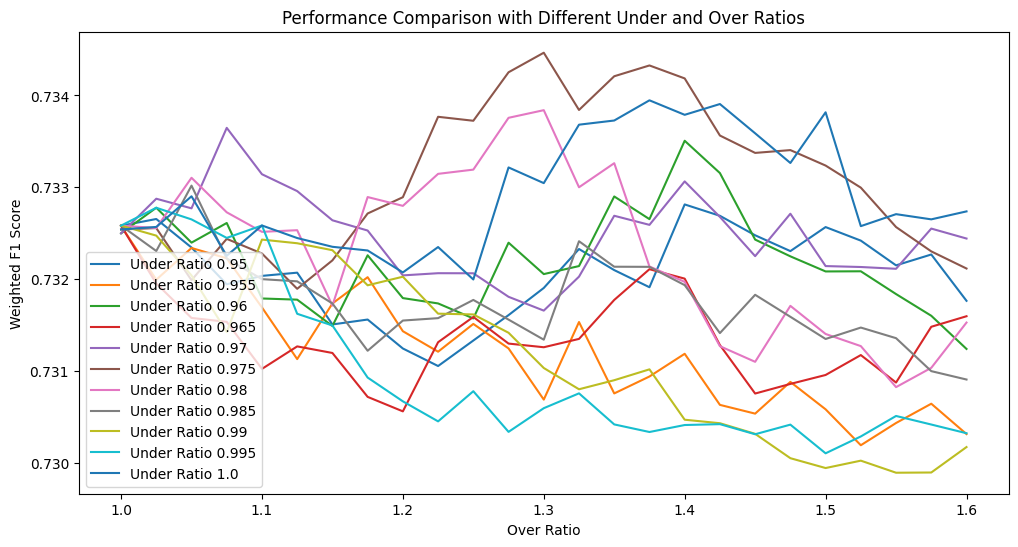

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# 설정
under_ratios = np.arange(0.95, 1.0, 0.005)
over_ratios = np.arange(1, 1.6, 0.025)

# 결과 저장
results = []

# 데이터 프레임에서 독립 변수와 종속 변수를 분리
X = df.drop('diabete', axis=1)
y = df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 (라플라스 스무딩 적용)
alpha_value = 0  # 라플라스 스무딩 파라미터
mnb_model = MultinomialNB(alpha=alpha_value)

# 실험
for under_ratio in under_ratios:
    for over_ratio in over_ratios:
        # 언더샘플링
        under_sampler = RandomUnderSampler(sampling_strategy={0: int(under_ratio * len(y_train[y_train == 0])), 1: 500, 2: 500}, random_state=1)
        X_rs, y_rs = under_sampler.fit_resample(X_train, y_train)

        # 오버샘플링
        over_sampler = RandomOverSampler(sampling_strategy={0: len(y_train[y_train == 0]), 1: int(over_ratio * 500), 2: int(over_ratio * 500)}, random_state=1)
        X_rs, y_rs = over_sampler.fit_resample(X_rs, y_rs)

        # 모델 학습
        mnb_model.fit(X_rs, y_rs)

        # 예측
        y_pred = mnb_model.predict(X_test)

        # F1 Score 계산 및 저장
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append((under_ratio, over_ratio, f1))

# 결과를 선형 그래프로 비교
plt.figure(figsize=(12, 6))

for under_ratio in under_ratios:
    subset = [result for result in results if result[0] == under_ratio]
    plt.plot([result[1] for result in subset], [result[2] for result in subset], label=f'Under Ratio {under_ratio}')

plt.title('Performance Comparison with Different Under and Over Ratios')
plt.xlabel('Over Ratio')
plt.ylabel('Weighted F1 Score')
plt.legend()
plt.show()


## 최적의 모델

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 오버샘플링된 데이터 생성
# 이 과정은 실제 데이터에 맞게 구현해야 합니다.
# 여기서는 간단히 데이터프레임을 복제하는 방식으로 구현합니다.
oversampled_df = pd.concat([df[df['diabete'] == 0].sample(frac=0.95, replace=True, random_state=42),
                            df[df['diabete'] == 1].sample(frac=1.35, replace=True, random_state=42),
                            df[df['diabete'] == 2].sample(frac=1.55, replace=True, random_state=42)])

# 독립 변수와 종속 변수를 분리
X_over = oversampled_df.drop('diabete', axis=1)
y_over = oversampled_df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# 멀티노미얼 나이브 베이즈 모델 초기화
mnb_model = MultinomialNB()

# CatBoost 모델 초기화
catboost_model = CatBoostClassifier(random_state=42, verbose=False)

# RandomForest 모델 초기화 (예시로 추가)
rf_model = RandomForestClassifier(random_state=42)

# 블렌딩을 통한 앙상블 예측
def blending(X_train, X_test, y_train, models):
    predictions = pd.DataFrame()

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions[model.__class__.__name__] = y_pred

    return predictions

# 앙상블을 위한 모델 리스트
models = [mnb_model, catboost_model, rf_model]

# 블렌딩을 통한 앙상블 예측
ensemble_predictions_over = blending(X_train_over, X_test_over, y_train_over, models)

# Classification Report 출력
print("\nClassification Report (Blended Ensemble - Oversampled Data):")
print(classification_report(y_test_over, ensemble_predictions_over.mode(axis=1)[0]))

# Confusion Matrix 출력
print("\nConfusion Matrix (Blended Ensemble - Oversampled Data):")
print(confusion_matrix(y_test_over, ensemble_predictions_over.mode(axis=1)[0]))



Classification Report (Blended Ensemble - Oversampled Data):
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90     13573
         1.0       0.84      0.34      0.48      3581
         2.0       0.89      0.48      0.63       595

    accuracy                           0.84     17749
   macro avg       0.86      0.60      0.67     17749
weighted avg       0.84      0.84      0.81     17749


Confusion Matrix (Blended Ensemble - Oversampled Data):
[[13369   187    17]
 [ 2360  1204    17]
 [  261    48   286]]


## 다시한번

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/231202 데이터마이닝 팀플/sample_for_tom.csv")

Mounted at /content/drive


In [2]:
!pip install --upgrade catboost
!pip install --upgrade scikit-learn
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2



Confusion Matrix (Blended Ensemble - Oversampled Data):
[[13369   187    17]
 [ 2360  1204    17]
 [  261    48   286]]


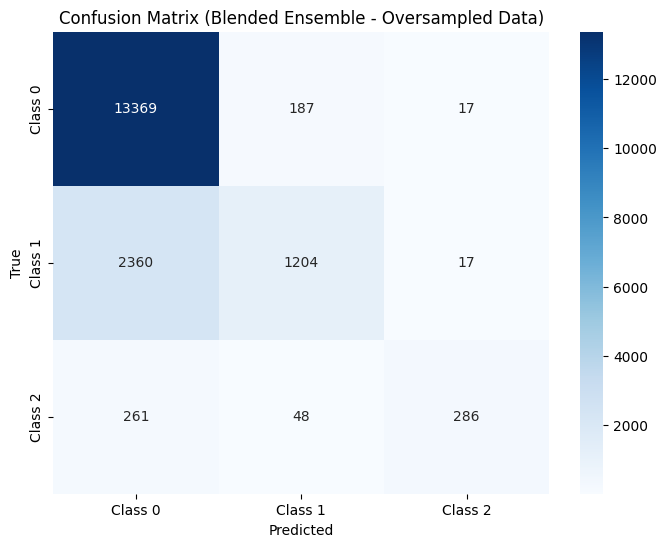

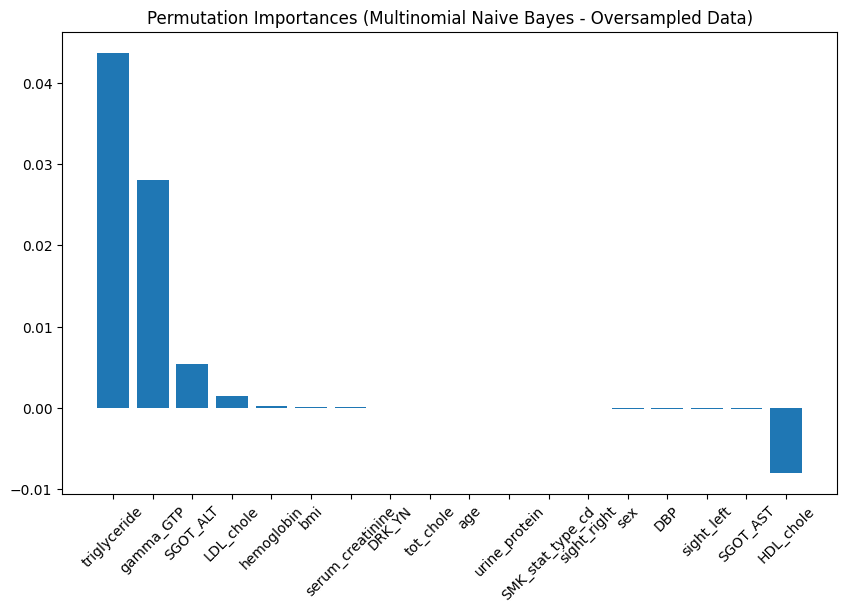

In [19]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# ...

# Confusion Matrix 출력
print("\nConfusion Matrix (Blended Ensemble - Oversampled Data):")
conf_matrix = confusion_matrix(y_test_over, ensemble_predictions_over.mode(axis=1)[0])
print(conf_matrix)

# 시각화를 위한 confusion matrix 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix (Blended Ensemble - Oversampled Data)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ...


# Permutation Importance 계산
result = permutation_importance(models[0], X_test_over, y_test_over, n_repeats=30, random_state=42)

# Permutation Importance 시각화
sorted_idx = result.importances_mean.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X_test_over.shape[1]), result.importances_mean[sorted_idx])
plt.xticks(range(X_test_over.shape[1]), X_test_over.columns[sorted_idx], rotation=45)
plt.title("Permutation Importances (Multinomial Naive Bayes - Oversampled Data)")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance

# 데이터 프레임에서 독립 변수와 종속 변수를 분리
X = df.drop('diabete', axis=1)
y = df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 멀티노미얼 나이브 베이즈 모델 초기화
mnb_model = MultinomialNB()

# CatBoost 모델 초기화
catboost_model = CatBoostClassifier(random_state=42, verbose=False)

# RandomForest 모델 초기화 (예시로 추가)
rf_model = RandomForestClassifier(random_state=42)

# 블렌딩을 통한 앙상블 예측
def blending(X_train, X_test, y_train, models):
    predictions = pd.DataFrame()

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions[model.__class__.__name__] = y_pred

    return predictions

# 앙상블을 위한 모델 리스트
models = [mnb_model, catboost_model, rf_model]

# 블렌딩을 통한 앙상블 예측
ensemble_predictions = blending(X_train, X_test, y_train, models)

# CatBoost 모델의 하이퍼파라미터 그리드 설정
param_dist = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128],
}

# CatBoost 모델에 대한 RandomizedSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
catboost_random = RandomizedSearchCV(
    catboost_model, param_distributions=param_dist, n_iter=10, cv=cv, scoring='accuracy', random_state=42
)

# 최적의 하이퍼파라미터로 CatBoost 모델 학습
catboost_random.fit(X_train, y_train)

# 최적의 모델로 예측
catboost_best_model = catboost_random.best_estimator_
y_pred_catboost = catboost_best_model.predict(X_test)

# Classification Report 출력
print("\nClassification Report (Best CatBoost Model):")
print(classification_report(y_test, y_pred_catboost))

# Confusion Matrix 출력
print("\nConfusion Matrix (Best CatBoost Model):")
print(confusion_matrix(y_test, y_pred_catboost))

# Permutation Importance 계산 (Best CatBoost Model)
result_catboost_best = permutation_importance(catboost_best_model, X_test, y_test, n_repeats=30, random_state=42)

# Permutation Importance 출력
print("\nPermutation Importance (Best CatBoost Model):")
for i, importance in enumerate(result_catboost_best.importances_mean):
    print(f'Feature {i + 1}: {importance}')

# Permutation Importance 시각화
plt.figure(figsize=(12, 4))
plt.bar(range(len(result_catboost_best.importances_mean)), result_catboost_best.importances_mean)
plt.xticks(range(len(result_catboost_best.importances_mean)), X_test.columns, rotation=45, ha='right')
plt.title('Permutation Importance - Best CatBoost Model')
plt.show()


In [13]:
import numpy as np
from tqdm import tqdm

def find_best_threshold(model, X_test, y_test, threshold_range=np.arange(0.1, 1.0, 0.1)):
    best_threshold = None
    best_f1_score = 0.0

    for threshold in tqdm(threshold_range, desc="Finding Best Threshold"):
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_prob > threshold).astype(int)

        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if f1_score > best_f1_score:
            best_f1_score = f1_score
            best_threshold = threshold

    return best_threshold, best_f1_score

# Best CatBoost 모델에 대한 최적의 임계값 찾기
best_threshold, best_f1_score = find_best_threshold(catboost_model, X_test, y_test)

# 최적의 임계값 출력
print(f"\nBest Threshold: {best_threshold}")
print(f"Best Weighted F1 Score: {best_f1_score}")

# 최적의 임계값을 적용한 예측
y_prob_best_threshold = catboost_model.predict_proba(X_test)[:, 1]
y_pred_best_threshold = (y_prob_best_threshold > best_threshold).astype(int)

# Classification Report 출력
classification_report_best_threshold = metrics.classification_report(y_test, y_pred_best_threshold)
print("\nClassification Report (Best Threshold):\n", classification_report_best_threshold)

# Confusion Matrix 출력
conf_matrix_best_threshold = metrics.confusion_matrix(y_test, y_pred_best_threshold)
print("\nConfusion Matrix (Best Threshold):\n", conf_matrix_best_threshold)


Finding Best Threshold: 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]



Best Threshold: 0.30000000000000004
Best Weighted F1 Score: 0.7797623856416559

Classification Report (Best Threshold):
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     14343
         1.0       0.34      0.26      0.30      2626
         2.0       0.00      0.00      0.00       356

    accuracy                           0.80     17325
   macro avg       0.40      0.39      0.39     17325
weighted avg       0.76      0.80      0.78     17325


Confusion Matrix (Best Threshold):
 [[13155  1188     0]
 [ 1937   689     0]
 [  204   152     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 오버샘플링된 데이터 생성
# 이 과정은 실제 데이터에 맞게 구현해야 합니다.
# 여기서는 간단히 데이터프레임을 복제하는 방식으로 구현합니다.
oversampled_df = pd.concat([df[df['diabete'] == 0].sample(frac=0.35, replace=True, random_state=42),
                            df[df['diabete'] == 1].sample(frac=1.95, replace=True, random_state=42),
                            df[df['diabete'] == 2].sample(frac=3.35, replace=True, random_state=42)])

# 독립 변수와 종속 변수를 분리
X_over = oversampled_df.drop('diabete', axis=1)
y_over = oversampled_df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# 멀티노미얼 나이브 베이즈 모델 초기화
mnb_model = MultinomialNB()

# CatBoost 모델 초기화
catboost_model = CatBoostClassifier(random_state=42, verbose=False)

# RandomForest 모델 초기화 (예시로 추가)
rf_model = RandomForestClassifier(random_state=42)

# 블렌딩을 통한 앙상블 예측
def blending(X_train, X_test, y_train, models):
    predictions = pd.DataFrame()

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions[model.__class__.__name__] = y_pred

    return predictions

# 앙상블을 위한 모델 리스트
models = [mnb_model, catboost_model, rf_model]

# 블렌딩을 통한 앙상블 예측
ensemble_predictions_over = blending(X_train_over, X_test_over, y_train_over, models)

# Classification Report 출력
print("\nClassification Report (Blended Ensemble - Oversampled Data):")
print(classification_report(y_test_over, ensemble_predictions_over.mode(axis=1)[0]))

# Confusion Matrix 출력
print("\nConfusion Matrix (Blended Ensemble - Oversampled Data):")
print(confusion_matrix(y_test_over, ensemble_predictions_over.mode(axis=1)[0]))



Classification Report (Blended Ensemble - Oversampled Data):
              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77      4947
         1.0       0.78      0.74      0.76      5260
         2.0       0.93      0.69      0.79      1241

    accuracy                           0.77     11448
   macro avg       0.81      0.75      0.77     11448
weighted avg       0.77      0.77      0.77     11448


Confusion Matrix (Blended Ensemble - Oversampled Data):
[[4018  904   25]
 [1322 3903   35]
 [ 199  185  857]]



Confusion Matrix (Blended Ensemble - Oversampled Data):
[[4018  904   25]
 [1322 3903   35]
 [ 199  185  857]]


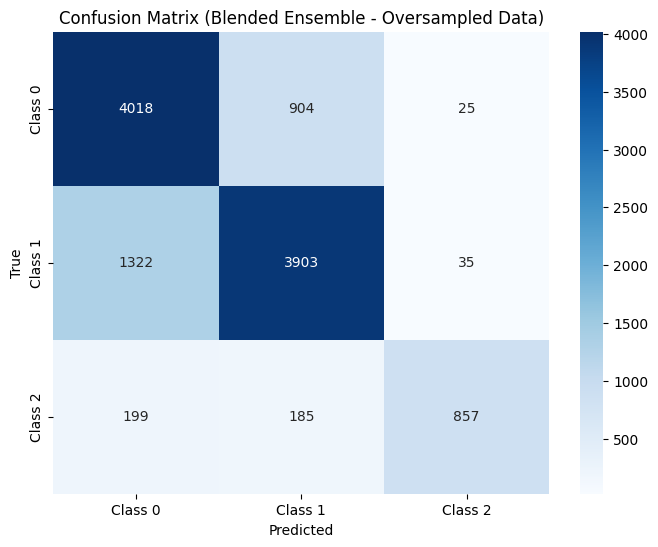

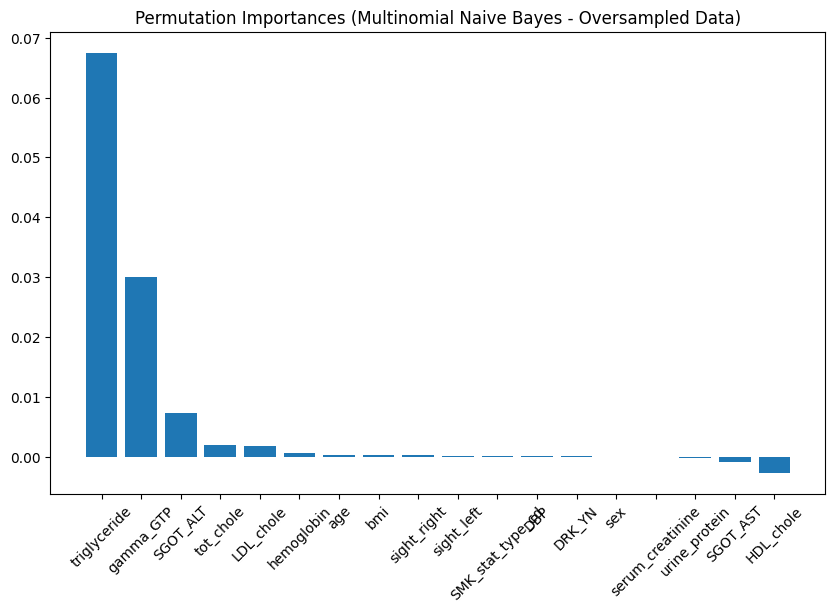

In [28]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# ...

# Confusion Matrix 출력
print("\nConfusion Matrix (Blended Ensemble - Oversampled Data):")
conf_matrix = confusion_matrix(y_test_over, ensemble_predictions_over.mode(axis=1)[0])
print(conf_matrix)

# 시각화를 위한 confusion matrix 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix (Blended Ensemble - Oversampled Data)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ...


# Permutation Importance 계산
result = permutation_importance(models[0], X_test_over, y_test_over, n_repeats=30, random_state=42)

# Permutation Importance 시각화
sorted_idx = result.importances_mean.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X_test_over.shape[1]), result.importances_mean[sorted_idx])
plt.xticks(range(X_test_over.shape[1]), X_test_over.columns[sorted_idx], rotation=45)
plt.title("Permutation Importances (Multinomial Naive Bayes - Oversampled Data)")
plt.show()

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 오버샘플링된 데이터 생성
# 이 과정은 실제 데이터에 맞게 구현해야 합니다.
# 여기서는 간단히 데이터프레임을 복제하는 방식으로 구현합니다.
oversampled_df = pd.concat([df[df['diabete'] == 0].sample(frac=0.35, replace=True, random_state=42),
                            df[df['diabete'] == 1].sample(frac=1.95, replace=True, random_state=42),
                            df[df['diabete'] == 2].sample(frac=8.05, replace=True, random_state=42)])

# 독립 변수와 종속 변수를 분리
X_over = oversampled_df.drop('diabete', axis=1)
y_over = oversampled_df['diabete']

# 학습 데이터와 테스트 데이터로 나누기
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# 멀티노미얼 나이브 베이즈 모델 초기화
mnb_model = MultinomialNB()

# CatBoost 모델 초기화
catboost_model = CatBoostClassifier(random_state=42, verbose=False)

# RandomForest 모델 초기화 (예시로 추가)
rf_model = RandomForestClassifier(random_state=42)

# 블렌딩을 통한 앙상블 예측
def blending(X_train, X_test, y_train, models):
    predictions = pd.DataFrame()

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictions[model.__class__.__name__] = y_pred

    return predictions

# 앙상블을 위한 모델 리스트
models = [mnb_model, catboost_model, rf_model]

# 블렌딩을 통한 앙상블 예측
ensemble_predictions_over = blending(X_train_over, X_test_over, y_train_over, models)

# Classification Report 출력
print("\nClassification Report (Blended Ensemble - Oversampled Data):")
print(classification_report(y_test_over, ensemble_predictions_over.mode(axis=1)[0]))

# Confusion Matrix 출력
print("\nConfusion Matrix (Blended Ensemble - Oversampled Data):")
print(confusion_matrix(y_test_over, ensemble_predictions_over.mode(axis=1)[0]))



Classification Report (Blended Ensemble - Oversampled Data):
              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76      4950
         1.0       0.79      0.71      0.75      5323
         2.0       0.92      0.85      0.89      2909

    accuracy                           0.78     13182
   macro avg       0.81      0.79      0.80     13182
weighted avg       0.79      0.78      0.78     13182


Confusion Matrix (Blended Ensemble - Oversampled Data):
[[4019  851   80]
 [1410 3779  134]
 [ 244  179 2486]]



Confusion Matrix (Blended Ensemble - Oversampled Data):
[[4019  851   80]
 [1410 3779  134]
 [ 244  179 2486]]


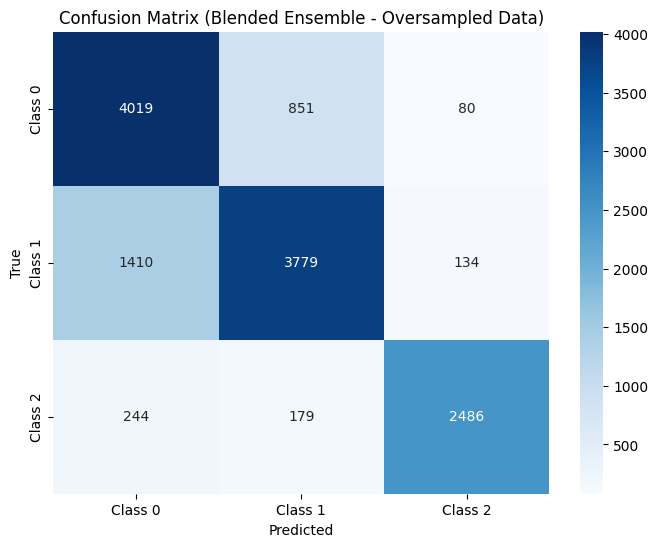

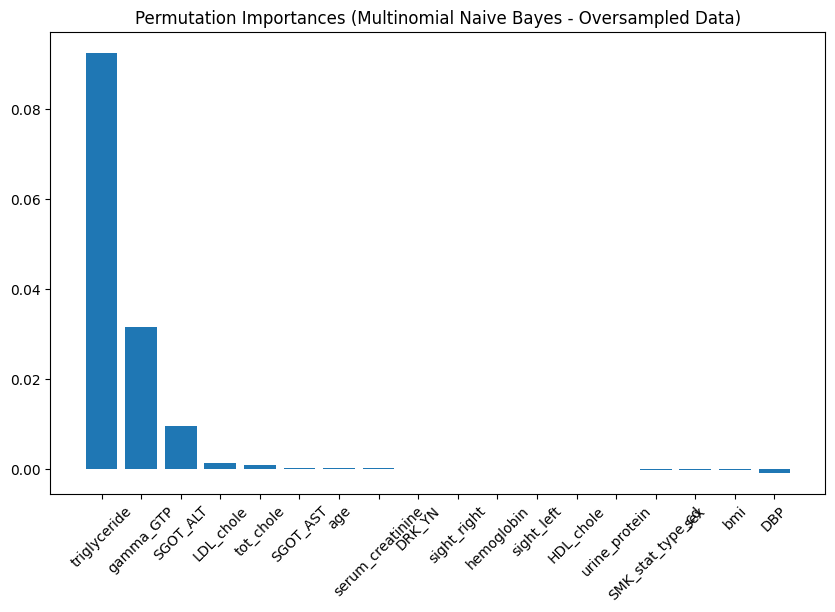

In [30]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# ...

# Confusion Matrix 출력
print("\nConfusion Matrix (Blended Ensemble - Oversampled Data):")
conf_matrix = confusion_matrix(y_test_over, ensemble_predictions_over.mode(axis=1)[0])
print(conf_matrix)

# 시각화를 위한 confusion matrix 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix (Blended Ensemble - Oversampled Data)")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ...


# Permutation Importance 계산
result = permutation_importance(models[0], X_test_over, y_test_over, n_repeats=30, random_state=42)

# Permutation Importance 시각화
sorted_idx = result.importances_mean.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X_test_over.shape[1]), result.importances_mean[sorted_idx])
plt.xticks(range(X_test_over.shape[1]), X_test_over.columns[sorted_idx], rotation=45)
plt.title("Permutation Importances (Multinomial Naive Bayes - Oversampled Data)")
plt.show()